In [ ]:
'''
1. Data Preprocessing:

- Load the dataset and clean it (handle missing values, duplicate rows, and incorrect data).
- Convert the OrderDate column to datetime format.
- Create a new column YearMonth (e.g., "2024-01") for grouping by month.
'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# lines module is part of Matplotlib that contains functions and classes to work with line objects in a plot (such as creating custom lines, segments, or annotations on plots).
import matplotlib.lines as mlines

ecommerce_data = pd.read_csv('ecommerce_data.csv')       # Read the 'ecommerce_data.csv' file and store its contents in a Pandas DataFrame
ecommerce_data

,CustomerID,OrderID,OrderDate,ProductID,Category,Quantity,Price,TotalAmount
0,1032,8b0a91ff-8031-4196-9e99-30106e4787cb,2023-08-01,2594,Home Decor,5,136.60,683.00
1,1004,180399ed-a80a-47c8-a9ba-a8aa45e0b768,2024-02-11,2172,Electronics,1,21.80,21.80
2,1021,558017f3-c41e-4f1a-94c4-9ad3f40a53c1,2024-07-22,2332,Clothing,9,181.53,1633.77
3,1046,1e6976ec-1132-4c32-b295-04ed2f3bcf7a,2023-11-19,2995,Electronics,2,10.20,20.40
4,1043,dbc6446a-b911-4815-94c3-3cf39cfa94bf,2023-03-03,2995,Toys,7,61.63,431.41
...,...,...,...,...,...,...,...,...
995,1021,78726029-472f-4e6c-93d6-018b065fccf0,2024-05-10,2569,Clothing,5,25.90,129.50
996,1042,ade85078-f864-44f8-ae3d-ad1213b8a6f0,2023-08-28,2145,Home Decor,3,214.96,644.88
997,1011,0a25a4d2-8258-4496-8b72-92c33a9b4e2e,2025-01-14,2910,Books,5,123.14,615.70
998,1027,26a41c51-0682-4b0e-915d-95e0e63cbc72,2023-04-27,2578,Books,9,95.94,863.46


In [12]:
missing_values = ecommerce_data.isna().sum()      # checking number of missing values in each column 
print(f"Number of missing values in each column:\n\n{missing_values}")

Number of missing values in each column:

CustomerID     0
OrderID        0
OrderDate      0
ProductID      0
Category       0
Quantity       0
Price          0
TotalAmount    0
dtype: int64


In [13]:
Duplicate_rows = ecommerce_data.duplicated()  # Identifying duplicate rows
Total_duplicates = Duplicate_rows.sum()       # Counting the number of duplicate rows

print(f"Total number of duplicate rows: {Total_duplicates}")


Total number of duplicate rows: 0


In [3]:
# Converting 'OrderDate' column to datetime and handling errors by coercing invalid entries
ecommerce_data['OrderDate'] = pd.to_datetime(ecommerce_data['OrderDate'], errors='coerce')

'''Creating 'YearMonth' column by extracting the year and month from 'OrderDate'
we can use this method also ( ecommerce_data['YearMonth'] = ecommerce_data['OrderDate'].dt.strftime('%Y-%m') ).
but i used direct method to convert it( ecommerce_data['OrderDate'].dt.to_period('M') ).
'''
ecommerce_data['YearMonth'] = ecommerce_data['OrderDate'].dt.to_period('M')

# Printing rows where the 'OrderDate' column has missing (NaN) values in the DataFrame

print(ecommerce_data[ecommerce_data['OrderDate'].isna()])
print()
ecommerce_data

Empty DataFrame
Columns: [CustomerID, OrderID, OrderDate, ProductID, Category, Quantity, Price, TotalAmount, YearMonth]
Index: []



,CustomerID,OrderID,OrderDate,ProductID,Category,Quantity,Price,TotalAmount,YearMonth
0,1032,8b0a91ff-8031-4196-9e99-30106e4787cb,2023-08-01,2594,Home Decor,5,136.60,683.00,2023-08
1,1004,180399ed-a80a-47c8-a9ba-a8aa45e0b768,2024-02-11,2172,Electronics,1,21.80,21.80,2024-02
2,1021,558017f3-c41e-4f1a-94c4-9ad3f40a53c1,2024-07-22,2332,Clothing,9,181.53,1633.77,2024-07
3,1046,1e6976ec-1132-4c32-b295-04ed2f3bcf7a,2023-11-19,2995,Electronics,2,10.20,20.40,2023-11
4,1043,dbc6446a-b911-4815-94c3-3cf39cfa94bf,2023-03-03,2995,Toys,7,61.63,431.41,2023-03
...,...,...,...,...,...,...,...,...,...
995,1021,78726029-472f-4e6c-93d6-018b065fccf0,2024-05-10,2569,Clothing,5,25.90,129.50,2024-05
996,1042,ade85078-f864-44f8-ae3d-ad1213b8a6f0,2023-08-28,2145,Home Decor,3,214.96,644.88,2023-08
997,1011,0a25a4d2-8258-4496-8b72-92c33a9b4e2e,2025-01-14,2910,Books,5,123.14,615.70,2025-01
998,1027,26a41c51-0682-4b0e-915d-95e0e63cbc72,2023-04-27,2578,Books,9,95.94,863.46,2023-04


In [ ]:
'''
2. Customer Retention Analysis:

- Calculate the number of unique customers each month.
- Identify the percentage of returning customers vs new customers each month.
- Plot a trend of customer retention over time.
'''

Unique Customers per month:

YearMonth
2023-01     6
2023-02    25
2023-03    32
2023-04    25
2023-05    27
2023-06    26
2023-07    34
2023-08    25
2023-09    31
2023-10    31
2023-11    35
2023-12    29
2024-01    31
2024-02    25
2024-03    27
2024-04    36
2024-05    34
2024-06    21
2024-07    30
2024-08    28
2024-09    31
2024-10    24
2024-11    22
2024-12    31
2025-01    31
Freq: M, Name: CustomerID, dtype: int64


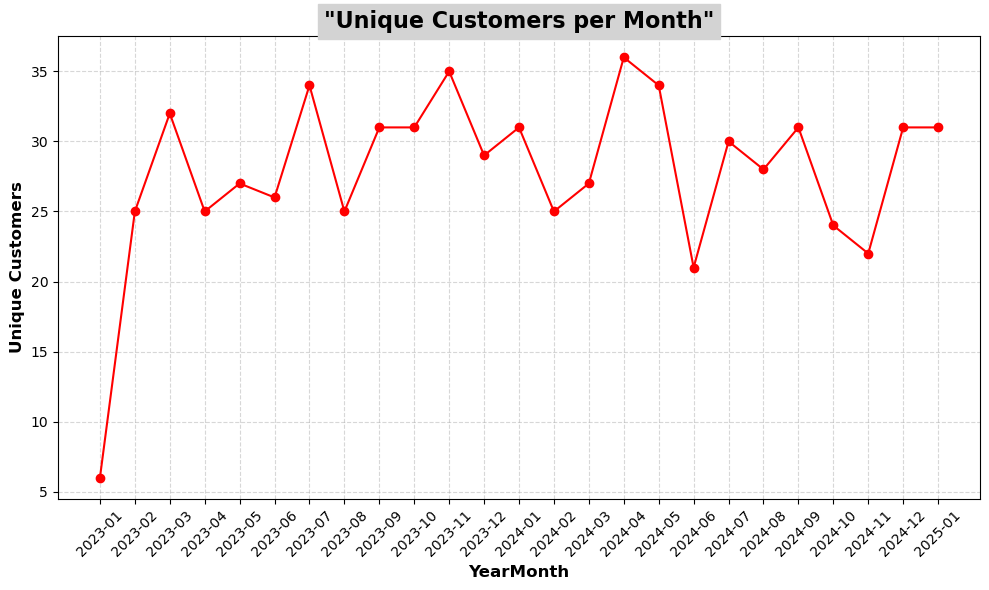

In [4]:
# Group by YearMonth and got the count of unique CustomerID'

unique_customers_per_month = ecommerce_data.groupby('YearMonth')['CustomerID'].nunique()
print(f"Unique Customers per month:\n\n{unique_customers_per_month}")

# Set the size of the figure (width, height in inches)
plt.figure(figsize=(10, 6))

'''Plotted the data for 'unique_customers_per_month' with 'YearMonth' on the x-axis
 Converted the index to string (to ensure it's in the correct format) and plot with red color, circle markers, and solid line style'''
plt.plot(unique_customers_per_month.index.astype(str), unique_customers_per_month, marker='o', linestyle='-', color='r')

# Set the title of the plot with bold text, larger font size, and a light gray background
plt.title('"Unique Customers per Month"', fontweight='bold', fontsize=16, color='black', backgroundcolor='lightgray')

# Set the label for the x-axis (with bold text and font size 12)
plt.xlabel('YearMonth', fontweight='bold', fontsize=12)

# Set the label for the y-axis (with bold text and font size 12)
plt.ylabel('Unique Customers', fontweight='bold', fontsize=12)

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adding a grid to the plot with dashed lines and semi-transparent grid lines (alpha = 0.5)
plt.grid(True, linestyle='--', alpha=0.5)

# Automatically adjust subplot parameters to give some padding and prevent clipping of labels
plt.tight_layout()

# Displaying the plot
plt.show()



In [6]:
# Get the first purchase month for each customer
ecommerce_data['FirstPurchaseMonth'] = ecommerce_data.groupby('CustomerID')['OrderDate'].transform('min').dt.to_period('M')

# Marking customers as 'New Customer' or 'Returning Customer'
ecommerce_data['CustomerType'] = np.where(ecommerce_data['YearMonth'] == ecommerce_data['FirstPurchaseMonth'], 'New Customers', 'Returning Customers')

# Group by 'YearMonth' and calculate counts
monthly_counts = ecommerce_data.groupby(['YearMonth', 'CustomerType'])['CustomerID'].nunique().unstack(fill_value=0)

# Calculating percentage
monthly_counts['Total'] = monthly_counts.sum(axis=1)
monthly_counts['Percentage of NewCustomer'] = (monthly_counts['New Customers'] / monthly_counts['Total']) * 100
monthly_counts['Percentage of ReturningCustomer'] = (monthly_counts['Returning Customers'] / monthly_counts['Total']) * 100

print(f"Percentage of Returning customers vs New customers each month: \n\n{monthly_counts[['Percentage of NewCustomer', 'Percentage of ReturningCustomer']]}")

Percentage of Returning customers vs New customers each month: 

CustomerType  Percentage of NewCustomer  Percentage of ReturningCustomer
YearMonth                                                               
2023-01                      100.000000                         0.000000
2023-02                       76.000000                        24.000000
2023-03                       53.125000                        46.875000
2023-04                       28.000000                        72.000000
2023-05                        3.703704                        96.296296
2023-06                        3.846154                        96.153846
2023-07                        0.000000                       100.000000
2023-08                        0.000000                       100.000000
2023-09                        0.000000                       100.000000
2023-10                        0.000000                       100.000000
2023-11                        0.000000                    

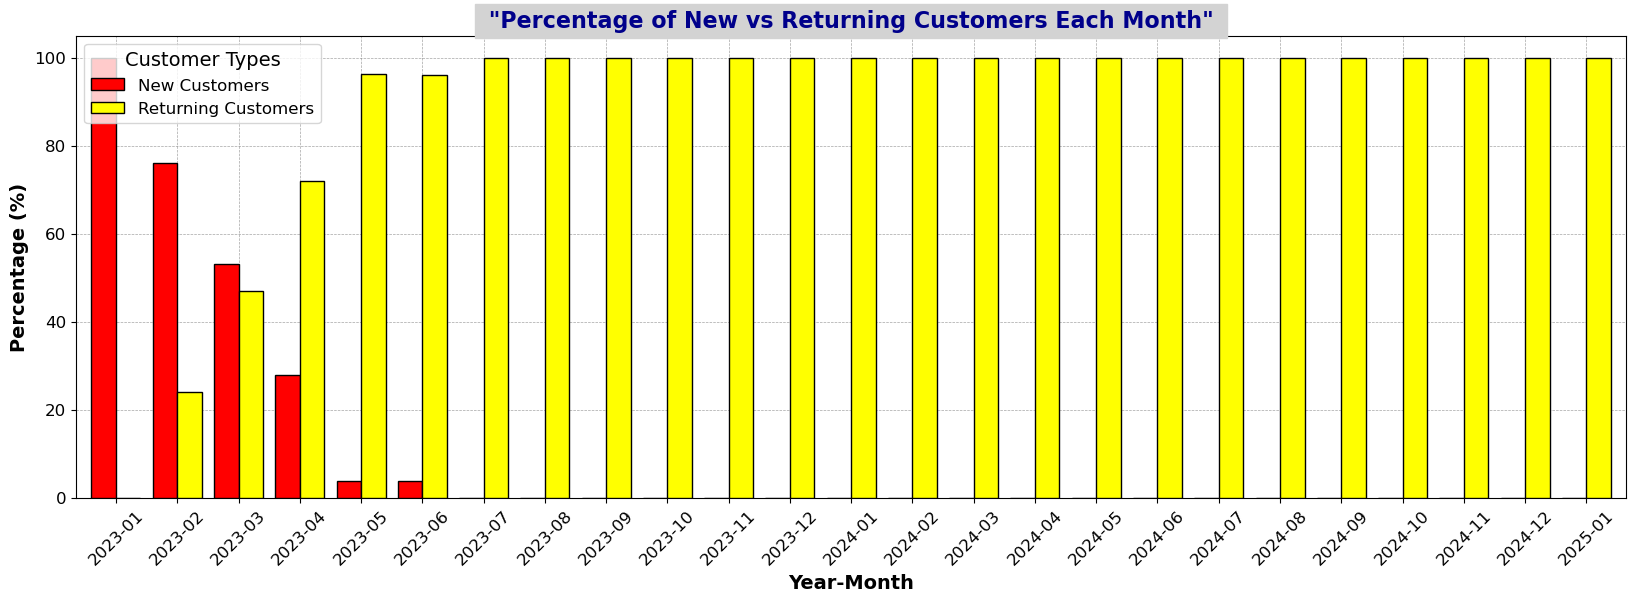

In [7]:
# Ploting the percentages of New vs Returning customers per month
# Define the colors for the bar chart
colors = ['red', 'yellow']

# Plot a bar chart showing the percentage of new and returning customers for each month
monthly_counts[['Percentage of NewCustomer', 'Percentage of ReturningCustomer']].plot(
    kind='bar',            # Create a bar chart
    figsize=(20, 6),       # Set the size of the figure (width = 20, height = 6)
    width=0.8,            # Set the width of the bars
    color=colors,         # Use the specified colors (red for new customers, yellow for returning customers)
    edgecolor='black',    # Set the color of the bar edges to black
    zorder=3              # Set the z-order to 3 (which ensures the bars are drawn above the grid)
)

# Set the title of the plot with bold text, dark blue color, and a light gray background
plt.title(' "Percentage of New vs Returning Customers Each Month" ', fontsize=16, fontweight='bold', color='darkblue', backgroundcolor='lightgray')

# Set the label for the x-axis (Year-Month) with bold text and font size 14
plt.xlabel('Year-Month', fontsize=14, fontweight='bold')

# Set the label for the y-axis (Percentage) with bold text and font size 14
plt.ylabel('Percentage (%)', fontsize=14, fontweight='bold')

# Rotate the x-axis labels by 45 degrees for better readability and set their font size to 12
plt.xticks(rotation=45, fontsize=12)

# Set the font size for the y-axis ticks to 12
plt.yticks(fontsize=12)

# Add a grid with dashed lines, 0.5 line width, gray color, and 70% transparency, and ensure it appears below the bars (zorder=0)
plt.grid(True, linestyle='--', linewidth=0.5, color='gray', alpha=0.7, zorder=0)

# Add a legend with labels for new and returning customers, in the upper-left corner, with a title and specified font sizes
plt.legend(["New Customers", "Returning Customers"], loc='upper left', fontsize=12, title="Customer Types", title_fontsize=14)

# Display the plot
plt.show()


CustomerType  New Customers  Returning Customers  Total  Retention Rate
YearMonth                                                              
2023-01                   6                    0      6        0.000000
2023-02                  19                    6     25       24.000000
2023-03                  17                   15     32       46.875000
2023-04                   7                   18     25       72.000000
2023-05                   1                   26     27       96.296296
2023-06                   1                   25     26       96.153846
2023-07                   0                   34     34      100.000000
2023-08                   0                   25     25      100.000000
2023-09                   0                   31     31      100.000000
2023-10                   0                   31     31      100.000000
2023-11                   0                   35     35      100.000000
2023-12                   0                   29     29      100

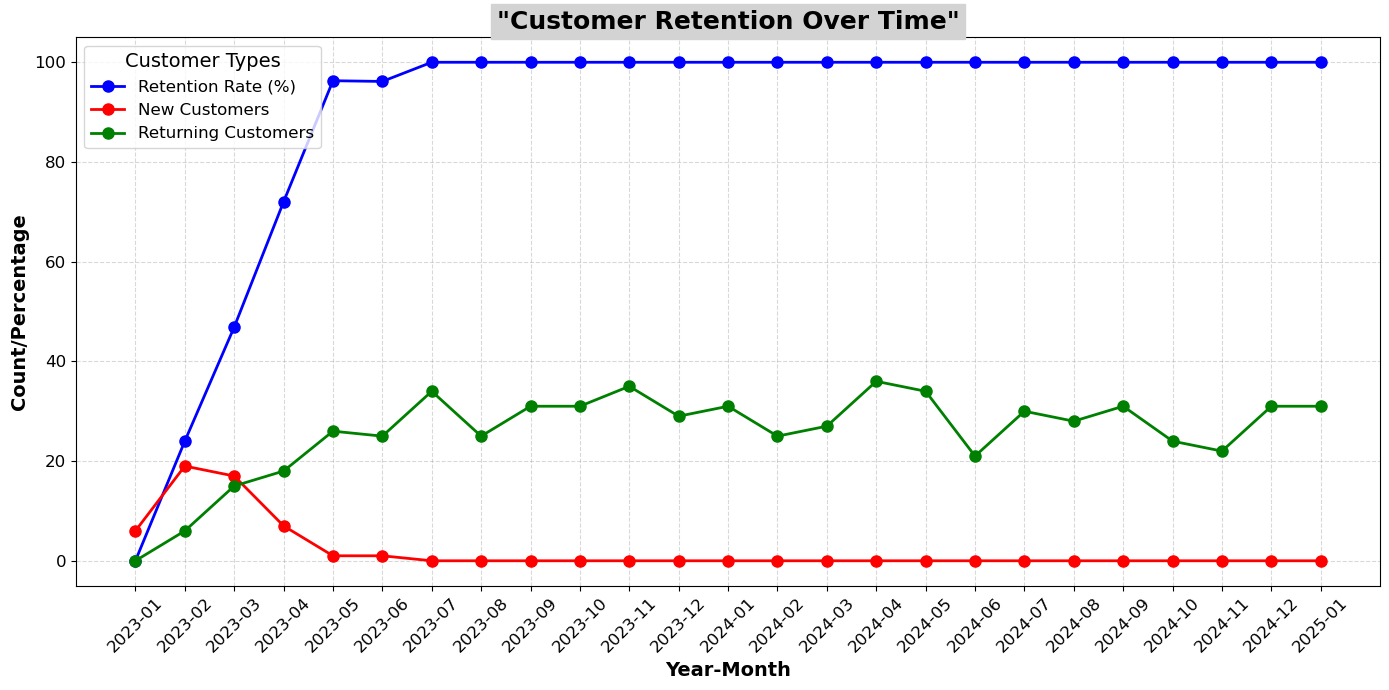

In [53]:
# Calculating retention rate(By dividing the number of returning customers by the total number of customers in each month and multiplying by 100)
monthly_counts['Retention Rate'] = (monthly_counts['Returning Customers'] / monthly_counts['Total']) * 100

print(monthly_counts[['New Customers', 'Returning Customers', 'Total', 'Retention Rate']])
print()

# Converting Period index to string for better compatibility with plotting
monthly_counts.index = monthly_counts.index.astype(str)

# Plotting the Retention Rate Over Time along with New and Returning Customers
plt.figure(figsize=(14, 7))

# Plotting the Retention Rate Over Time
plt.plot(monthly_counts.index, monthly_counts['Retention Rate'], marker='o', linestyle='-', color='blue', markersize=8, linewidth=2, label="Retention Rate (%)")

# Plotting New Customers over time
plt.plot(monthly_counts.index, monthly_counts['New Customers'], marker='o', linestyle='-', color='red', markersize=8, linewidth=2, label="New Customers")

# Plotting Returning Customers over time
plt.plot(monthly_counts.index, monthly_counts['Returning Customers'], marker='o', linestyle='-', color='green', markersize=8, linewidth=2, label="Returning Customers")

# Adding labels and title with a refined font style and size
plt.title('"Customer Retention Over Time"', fontweight='bold', fontsize=18, color='black',backgroundcolor='lightgray')
plt.xlabel('Year-Month', fontweight='bold', fontsize=14, color='black')
plt.ylabel('Count/Percentage', fontweight='bold', fontsize=14, color='black')

# Improve x-axis labels with rotation and adjust font size
plt.xticks(rotation=45, fontsize=12)

# Set y-axis font size 
plt.yticks(fontsize=12)

plt.grid(True, linestyle='--', color='gray', alpha=0.3)

# Adding a legend to differentiate between the lines
plt.legend(loc='upper left', fontsize=12, title="Customer Types", title_fontsize=14)

# Tighten layout for a more visually appealing look
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
'''
3. Revenue Analysis:
- Calculate monthly revenue and plot a revenue trend.
- Identify the top 5 months with the highest revenue.
- Compute the average revenue per customer for each month.

'''

Monthly Revenue Over Time (in INR):
 YearMonth
2023-01     Rs.5,422.73
2023-02    Rs.50,523.89
2023-03    Rs.62,034.38
2023-04    Rs.63,149.95
2023-05    Rs.73,183.20
2023-06    Rs.56,909.03
2023-07    Rs.58,277.63
2023-08    Rs.48,361.02
2023-09    Rs.67,311.02
2023-10    Rs.63,238.89
2023-11    Rs.63,328.36
2023-12    Rs.48,670.94
2024-01    Rs.60,503.84
2024-02    Rs.35,057.94
2024-03    Rs.53,717.40
2024-04    Rs.67,884.07
2024-05    Rs.67,525.04
2024-06    Rs.48,433.65
2024-07    Rs.78,159.40
2024-08    Rs.47,025.51
2024-09    Rs.64,252.50
2024-10    Rs.50,424.46
2024-11    Rs.41,435.59
2024-12    Rs.61,527.79
2025-01    Rs.75,721.05
Freq: M, Name: TotalAmount, dtype: object



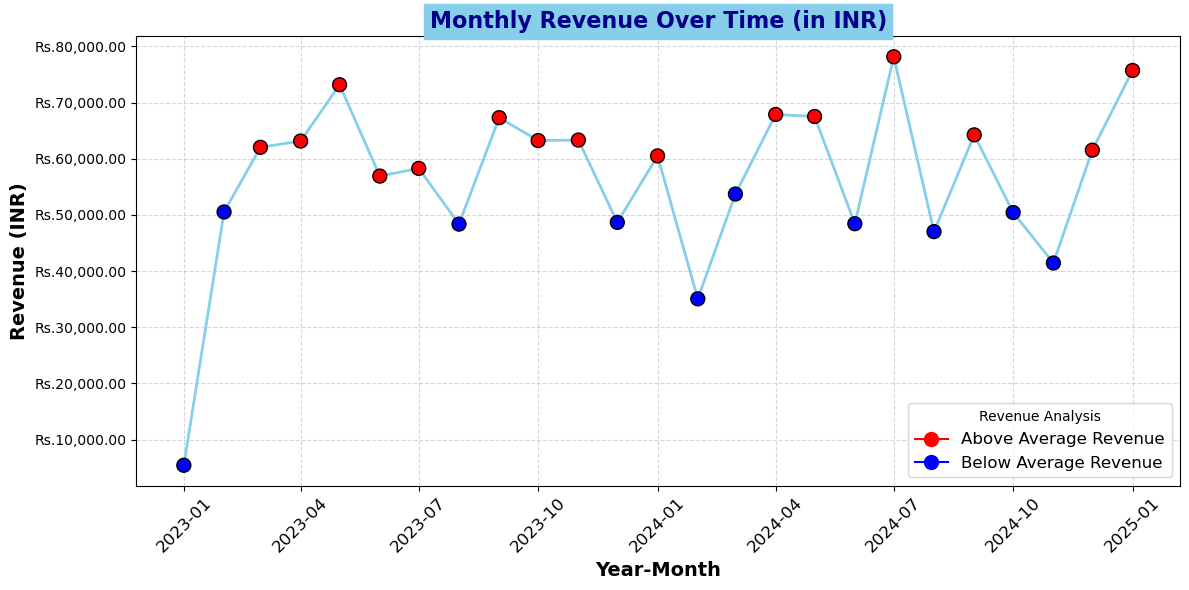

In [38]:
# Calculating monthly revenue by adding the totalAmount for each 'Month'
monthly_revenue = ecommerce_data.groupby('YearMonth')['TotalAmount'].sum()

print("Monthly Revenue Over Time (in INR):\n", monthly_revenue.apply(lambda x: f"Rs.{x:,.2f}"))    
# Rs.{x:,.2f} directly formats the value to show with rupees, add commas for thousands, and round it to two decimal places
print()


# Converting the PeriodIndex to a datetime format for plotting
monthly_revenue.index = monthly_revenue.index.to_timestamp()

 '''Creating a color array, red for revenue above average, blue for below
threshold = : This assigns the calculated mean value to a new variable called threshold.
So, the threshold will now store the average monthly revenue'''

threshold = monthly_revenue.mean()  # Average revenue as the threshold 

# Creating a list of colors where values above the threshold are 'red' and values below or equal to the threshold are 'blue'
colors = ['red' if value > threshold else 'blue' for value in monthly_revenue]

# Plotting the monthly revenue over time with colored markers
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue.index, monthly_revenue, color='skyblue', marker='o', linestyle='-', linewidth=2, markersize=5)

# adding the scatter plot of monthly revenue, where each point is color-coded based on whether it's above or below the threshold
plt.scatter(monthly_revenue.index, monthly_revenue, color=colors, zorder=5, s=100, edgecolors='black', marker='o')

# Adding title and labels
plt.title('Monthly Revenue Over Time (in INR)', fontsize=16, fontweight='bold', color='darkblue', backgroundcolor='skyblue')
plt.xlabel('Year-Month', fontsize=14, fontweight='bold')
plt.ylabel('Revenue (INR)', fontsize=14, fontweight='bold')

# Rotating the x-axis labels by 45 degrees for better readability and set the font size to 12
plt.xticks(rotation=45, fontsize=12)

# Format the y-axis labels to display numbers as currency with the prefix 'Rs.' and two decimal places
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'Rs.{x:,.2f}'))

# Creating custom legend entries for "Above Average Revenue" and "Below Average Revenue" using red and blue markers
red_patch = mlines.Line2D([], [], color='red', marker='o', markersize=10, label='Above Average Revenue')
blue_patch = mlines.Line2D([], [], color='blue', marker='o', markersize=10, label='Below Average Revenue')

# Add the customized legend for red and blue markers
plt.legend(handles=[red_patch, blue_patch], title="Revenue Analysis", loc='lower right', fontsize=12)

# Adding a grid to the plot with dashed lines and 50% transparency for better visualization
plt.grid(True, linestyle='--', alpha=0.5)

# Tight layout for better spacing
plt.tight_layout()

plt.show()


Top 5 Months with the Highest Revenue:

1. Month: 2024-07, Revenue: Rs.78,159.40
2. Month: 2025-01, Revenue: Rs.75,721.05
3. Month: 2023-05, Revenue: Rs.73,183.20
4. Month: 2024-04, Revenue: Rs.67,884.07
5. Month: 2024-05, Revenue: Rs.67,525.04



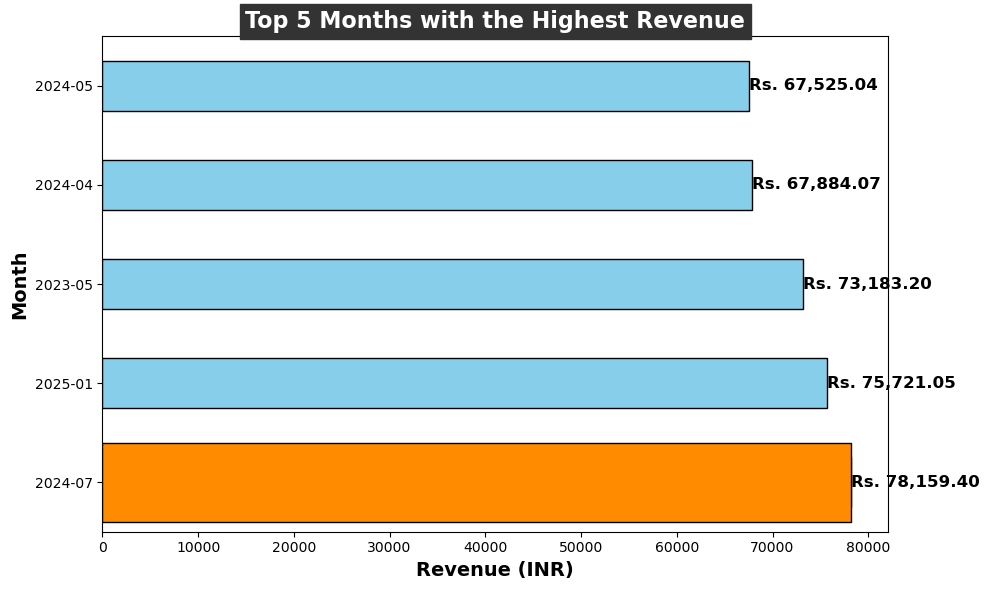

In [131]:
'''getting the top 5 months with the highest revenue
   enumerate() function is used to add numbering (index) to the months for better formatting. 
   start=1 ensures that numbering starts from 1'''

top_5_months = monthly_revenue.nlargest(5)

# Printing the top 5 months with the highest revenue
print("Top 5 Months with the Highest Revenue:\n")

# Iterating through the top 5 months and their corresponding revenues, and printing them with a formatted output
for index, (month, revenue) in enumerate(top_5_months.items(), start=1):
    print(f"{index}. Month: {month}, Revenue: Rs.{revenue:,.2f}")
print()

# Plotting the top 5 months with highest revenue as a horizontal bar chart
plt.figure(figsize=(10, 6))

# Creating the bar chart
top_5_months.plot(kind='barh', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Top 5 Months with the Highest Revenue', fontsize=16, fontweight='bold', color = 'white', backgroundcolor='#333333')
plt.xlabel('Revenue (INR)', fontsize=14, fontweight='bold')
plt.ylabel('Month', fontsize=14, fontweight='bold')

# Displaying the values on the bars
for index, value in enumerate(top_5_months):
    plt.text(value, index, f"Rs. {value:,.2f}", va='center', fontsize=12, color='black', fontweight='bold')

# Finding the maximum revenue value and the corresponding month from the top_5_months
max_value = top_5_months.max()
max_index = top_5_months.idxmax()

# Ensure the index is converted to string for plotting compatibility
max_index_str = str(max_index)

# Highlighting  the highest bar by setting the color to dark orange
plt.barh(max_index_str, max_value, color='darkorange', edgecolor='black', height=0.8)

plt.tight_layout()
plt.show()


Average Revenue Per Customer for each month:

            Avg_Revenue_Per_Customer
YearMonth                          
2023-01                  903.788333
2023-02                 1578.871562
2023-03                 1266.007755
2023-04                 1468.603488
2023-05                 1784.956098
2023-06                 1388.025122
2023-07                 1266.905000
2023-08                 1343.361667
2023-09                 1529.795909
2023-10                 1264.777800
2023-11                 1376.703478
2023-12                 1216.773500
2024-01                 1344.529778
2024-02                 1208.894483
2024-03                 1451.821622
2024-04                 1414.251458
2024-05                 1350.500800
2024-06                 1614.455000
2024-07                 1699.117391
2024-08                 1270.959730
2024-09                 1460.284091
2024-10                 1440.698857
2024-11                 1218.693824
2024-12                 1430.878837
2025-01          

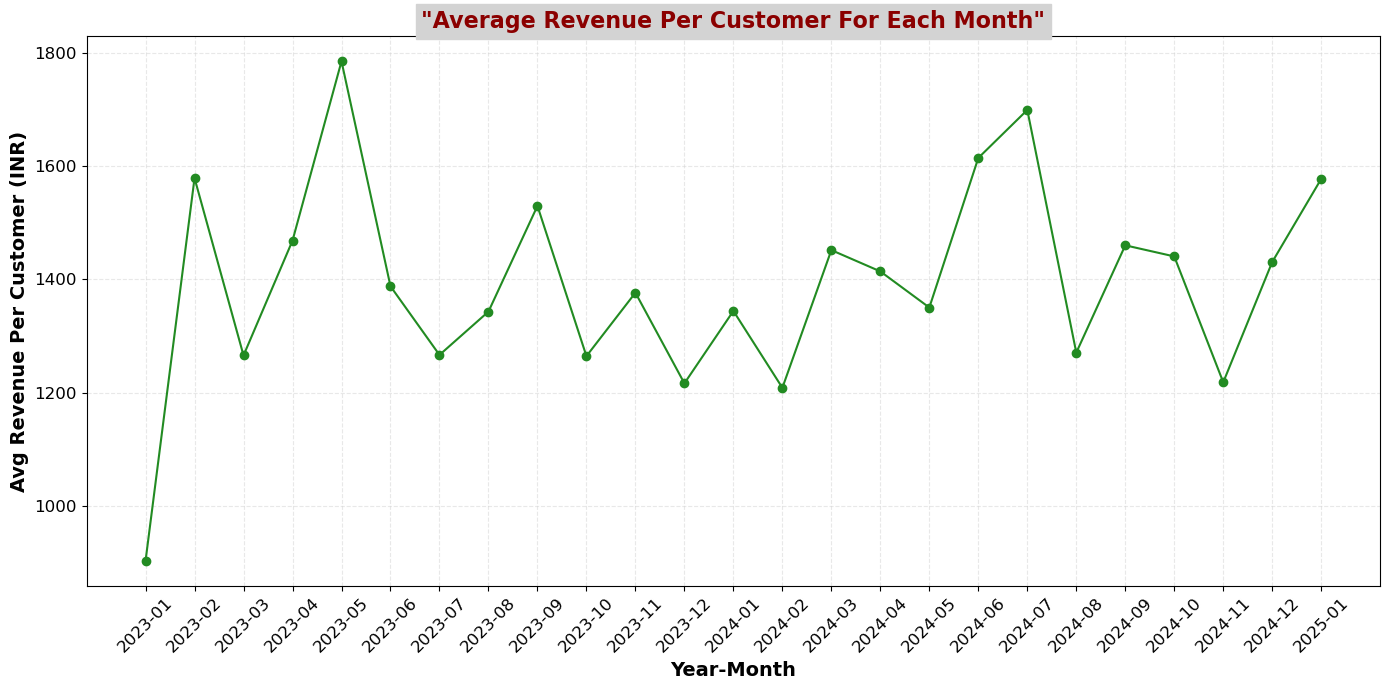

In [8]:
'''Grouped by YearMonth and calculated the total revenue and unique customers
Calculating the average revenue per customer for each month, based on the total amount spent by unique customers'''
monthly_revenue_per_customer = ecommerce_data.groupby('YearMonth').agg(
    Avg_Revenue_Per_Customer = ('TotalAmount', lambda x: x.sum() / x.nunique())
)

print("Average Revenue Per Customer for each month:\n\n", monthly_revenue_per_customer)


# Create a plot of the average revenue per customer for each month with custom styling and labels
plt.figure(figsize=(14, 7))  # Set the figure size (width, height)
plt.plot(monthly_revenue_per_customer.index.astype(str), monthly_revenue_per_customer['Avg_Revenue_Per_Customer'], marker='o', linestyle='-', color='forestgreen')

# Adding labels,title and plot title with custom font and background
plt.xlabel('Year-Month', fontsize=14, fontweight='bold')  # Label the x-axis with custom font size and weight
plt.title('"Average Revenue Per Customer For Each Month"', fontsize=16, fontweight='bold', color='darkred', backgroundcolor='lightgray')  
plt.ylabel('Avg Revenue Per Customer (INR)', fontsize=14, fontweight='bold')  # Label the y-axis with custom font size and weight
plt.xticks(rotation=45, fontsize=12)  # Rotate the x-axis labels by 45 degrees for better readability and set font size
plt.yticks(fontsize=12)  # Set font size for the y-axis tick labels
plt.grid(True, linestyle='--', alpha=0.5, color='lightgray')  # Add a grid with dashed lines and light transparency
plt.tight_layout()  
plt.show()  


In [ ]:
'''
4. Product Trend Analysis:

- Find the top 5 most sold products across all categories.
- Analyze which category generates the most revenue.
- Identify any seasonal trends in product sales.

'''

Top 5 Most Sold Products Across All Categories:

    ProductID     Category  TotalQuantitySold
1       2261         Toys                 32
2       2563  Electronics                 29
3       2100  Electronics                 27
4       2616   Home Decor                 27
5       2527   Home Decor                 27



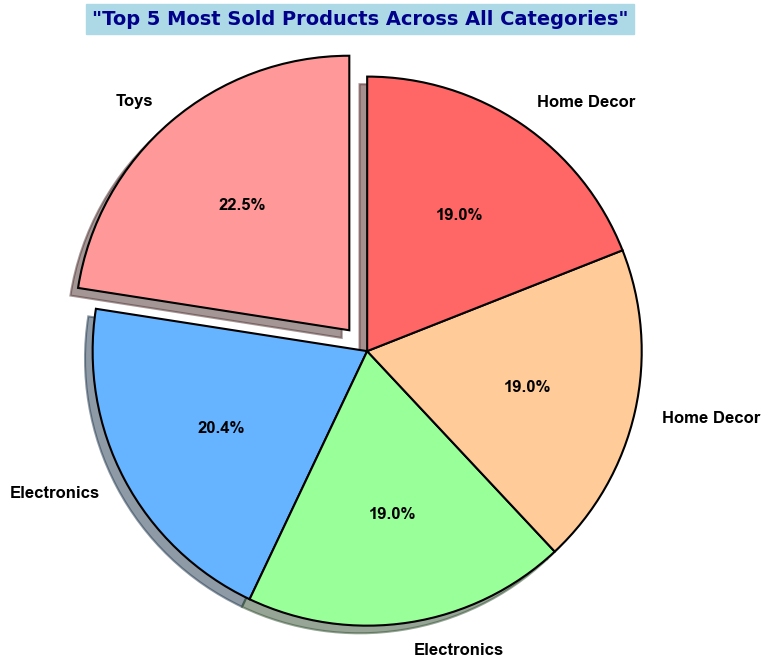

In [12]:
# Group by 'ProductID' and sum the 'Quantity' sold for each product
top_5_products = ecommerce_data.groupby('ProductID')['Quantity'].sum().nlargest(5)

# Merging with original data to get the corresponding 'Category' for each product
top_5_products_with_category = ecommerce_data[ecommerce_data['ProductID'].isin(top_5_products.index)].drop_duplicates(subset='ProductID')[['ProductID', 'Category']]

# Adding total quantity sold to the merged dataframe
top_5_products_with_category['TotalQuantitySold'] = top_5_products.values

# Resetting index and setting it to start from 1
top_5_products_with_category.index = range(1, len(top_5_products_with_category) + 1)

print("Top 5 Most Sold Products Across All Categories:\n\n", top_5_products_with_category)
print()


# Creating a list of custom colors to make the chart more vibrant
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6666']  

# Explode the largest slice slightly to make it stand out
explode = (0.1, 0, 0, 0, 0)  # Only "explode" the first slice

# Plotting Pie chart 
plt.figure(figsize=(8, 8))
plt.pie(top_5_products_with_category['TotalQuantitySold'],
        labels = top_5_products_with_category['Category'],  # Assign the 'Category' column as labels for each slice
        autopct = '%1.1f%%',  # Displaying the percentage for each slice with one decimal place
        startangle = 90,     # Rotating the start angle of the pie chart to 90 degrees (for better visualization)
        colors = colors,    # Using predefined 'colors' list to color the pie chart slices
        explode = explode,  # Using 'explode' list to slightly separate specific slices (for emphasis)
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'},  # Adding border for wedges
        textprops={'fontsize': 12, 'weight': 'bold', 'family': 'Arial'},  # Bold font style for labels
        shadow=True)  # Adding shadow for depth

# Adding a title with a background color
plt.title('"Top 5 Most Sold Products Across All Categories"', fontsize=14, weight='bold', backgroundcolor='lightblue', color='darkblue')

plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

plt.show()



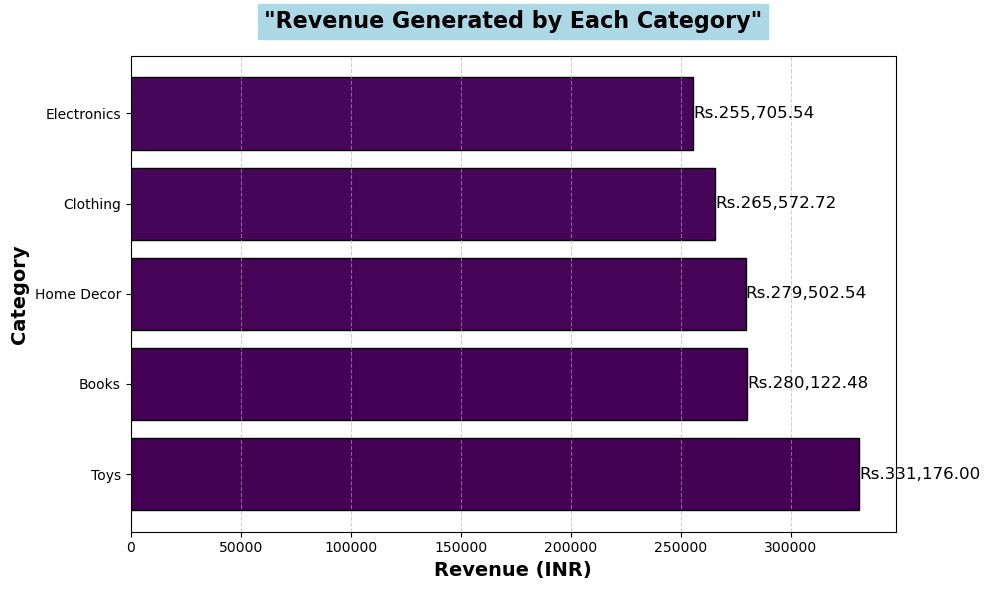

In [24]:

# Group by 'Category' and calculate total revenue for each category
category_revenue = ecommerce_data.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False)

# Plotting the data
plt.figure(figsize=(10, 6))

# Create a color palette for the bars (using a colormap)
colors = plt.cm.viridis(range(len(category_revenue)))

# Horizontal Bar Plot
bars = plt.barh(category_revenue.index, category_revenue.values, color=colors, edgecolor='black')

# Title with background color
plt.title('"Revenue Generated by Each Category"', fontsize=16, fontweight='bold', backgroundcolor='lightblue', pad=20)

# Labeling the axes
plt.xlabel('Revenue (INR)', fontsize=14, fontweight='bold')
plt.ylabel('Category', fontsize=14, fontweight='bold')

# Adding value labels to each bar each bar in the bar chart with its value formatted as currency
for bar in bars:
    width = bar.get_width()    # Get the width of the bar (representing the value)
    plt.text(width, bar.get_y() + bar.get_height() / 2, f"Rs.{width:,.2f}", va='center', fontsize=12, color='black')

# Adding gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



Monthly Product Sales (in INR):
 YearMonth
2023-01     Rs.5,422.73
2023-02    Rs.50,523.89
2023-03    Rs.62,034.38
2023-04    Rs.63,149.95
2023-05    Rs.73,183.20
2023-06    Rs.56,909.03
2023-07    Rs.58,277.63
2023-08    Rs.48,361.02
2023-09    Rs.67,311.02
2023-10    Rs.63,238.89
2023-11    Rs.63,328.36
2023-12    Rs.48,670.94
2024-01    Rs.60,503.84
2024-02    Rs.35,057.94
2024-03    Rs.53,717.40
2024-04    Rs.67,884.07
2024-05    Rs.67,525.04
2024-06    Rs.48,433.65
2024-07    Rs.78,159.40
2024-08    Rs.47,025.51
2024-09    Rs.64,252.50
2024-10    Rs.50,424.46
2024-11    Rs.41,435.59
2024-12    Rs.61,527.79
2025-01    Rs.75,721.05
Freq: M, Name: TotalAmount, dtype: object


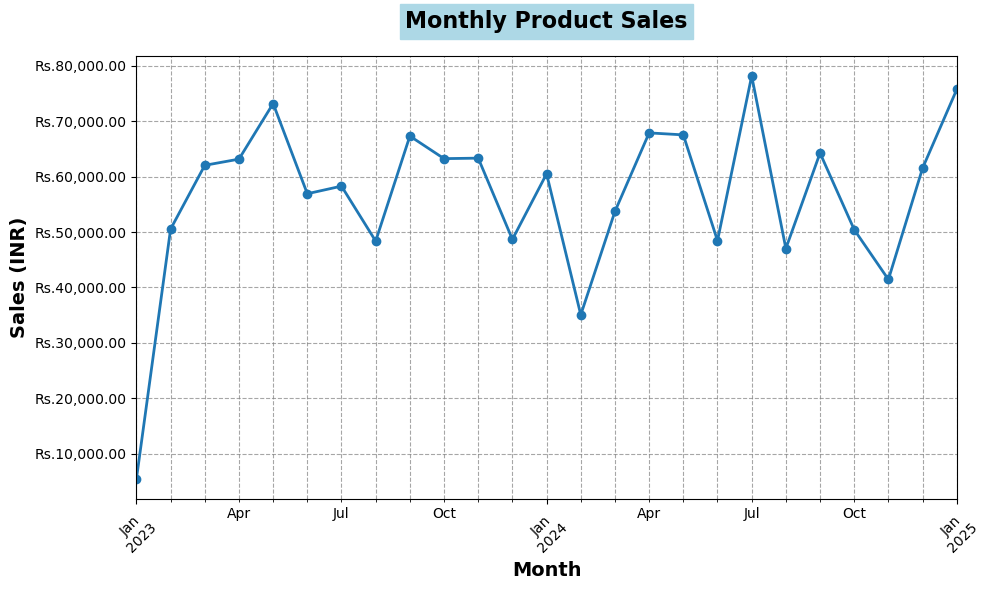

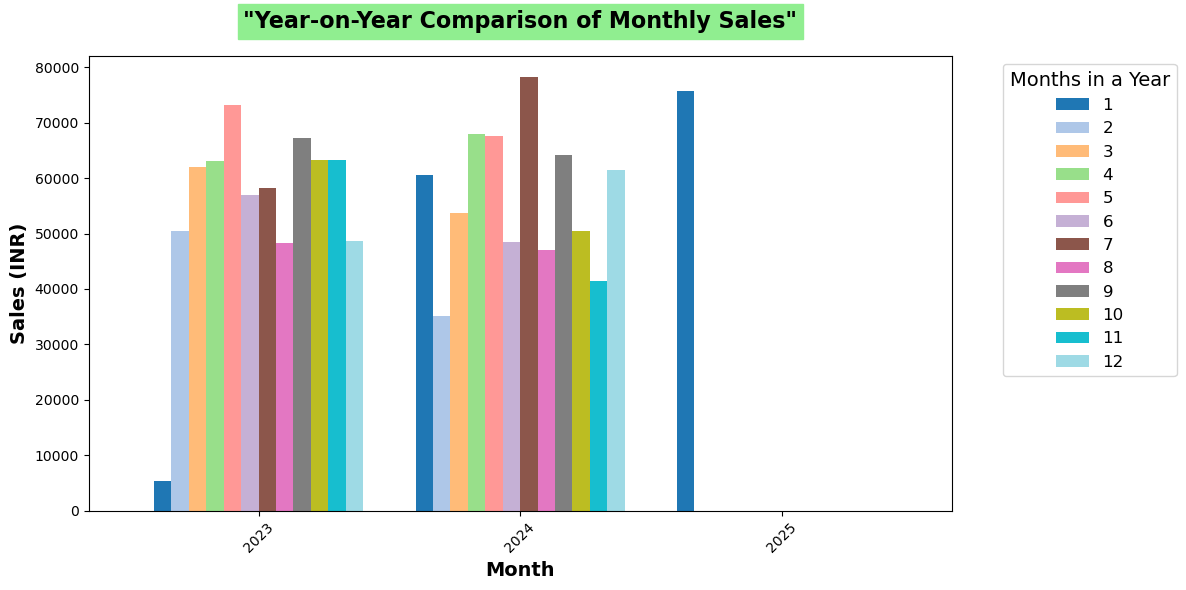

In [10]:
# Grouped by 'YearMonth' and calculate total revenue for each month
monthly_sales = ecommerce_data.groupby('YearMonth')['TotalAmount'].sum()
print("\nMonthly Product Sales (in INR):\n", monthly_sales.apply(lambda x: f"Rs.{x:,.2f}"))

# Plotting the sales trend (Line plot) 
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', title="Monthly Product Sales", color='tab:blue', linewidth=2, marker='o', markersize=6)

# Formatting the x and y axis labels
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Sales (INR)', fontsize=14, fontweight='bold')

# Formatting the y-axis with INR currency format
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'Rs.{x:,.2f}'))

# Rotate the x-ticks for better readability
plt.xticks(rotation=45)

# Adding gridlines for better readability
plt.grid(True, which='both', linestyle='--', alpha=0.7, color='gray')

# Title with background color
plt.title("Monthly Product Sales", fontsize=16, fontweight='bold', backgroundcolor='lightblue', pad=20)

# Show the plot with tight layout for better spacing
plt.tight_layout()
plt.show()
print()
# Extract Year and Month from 'OrderDate' for Year-over-Year comparison
ecommerce_data['Year'] = ecommerce_data['OrderDate'].dt.year
ecommerce_data['Month'] = ecommerce_data['OrderDate'].dt.month

# Group by Year and Month and sum the TotalAmount for Year-on-Year comparison

monthly_sales_yoy = ecommerce_data.groupby(['Year', 'Month'])['TotalAmount'].sum().unstack(fill_value=0)
'''unstack(): This pivots the grouped data, moving the 'Month' values from rows to columns.
result is a DataFrame where the rows are the 'Year' values, and the columns are the months (1 through 12).
fill_value=0: If any combination of year and month has no data (e.g: if no sales occurred for a given month),
fill_value=0 ensures that these missing values are replaced with 0 instead of NaN'''

# Plotting the Year-on-Year Comparison of Monthly Sales (Bar plot)
monthly_sales_yoy.plot(kind='bar', figsize=(12,6), colormap='tab20', width=0.8)

# Adding title, axis labels, and a legend for the years
plt.title('"Year-on-Year Comparison of Monthly Sales"', fontsize=16, fontweight='bold', backgroundcolor='lightgreen', pad=20)
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Sales (INR)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

'''Adding legend to the plot, with a title 'Months in a Year', customized font sizes for the title and labels
   and position the legend outside the plot area to the right (bbox_to_anchor).
   loc='upper left': Specifies that the legend should be anchored to the top left of the legend box.'''

plt.legend(title="Months in a Year", fontsize=12, title_fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

